In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd

In [2]:
color_list = {0: '#1f77b4', 1: '#ff7f0e', 2: '#2ca02c', 3: '#d62728', 4: '#9467bd', 5: '#8c564b', 6: '#e377c2', 7: '#7f7f7f', 8: '#bcbd22', 9: '#17becf', -1: '#000000', -2: '#ff0000'}
features_dir = '../features/'

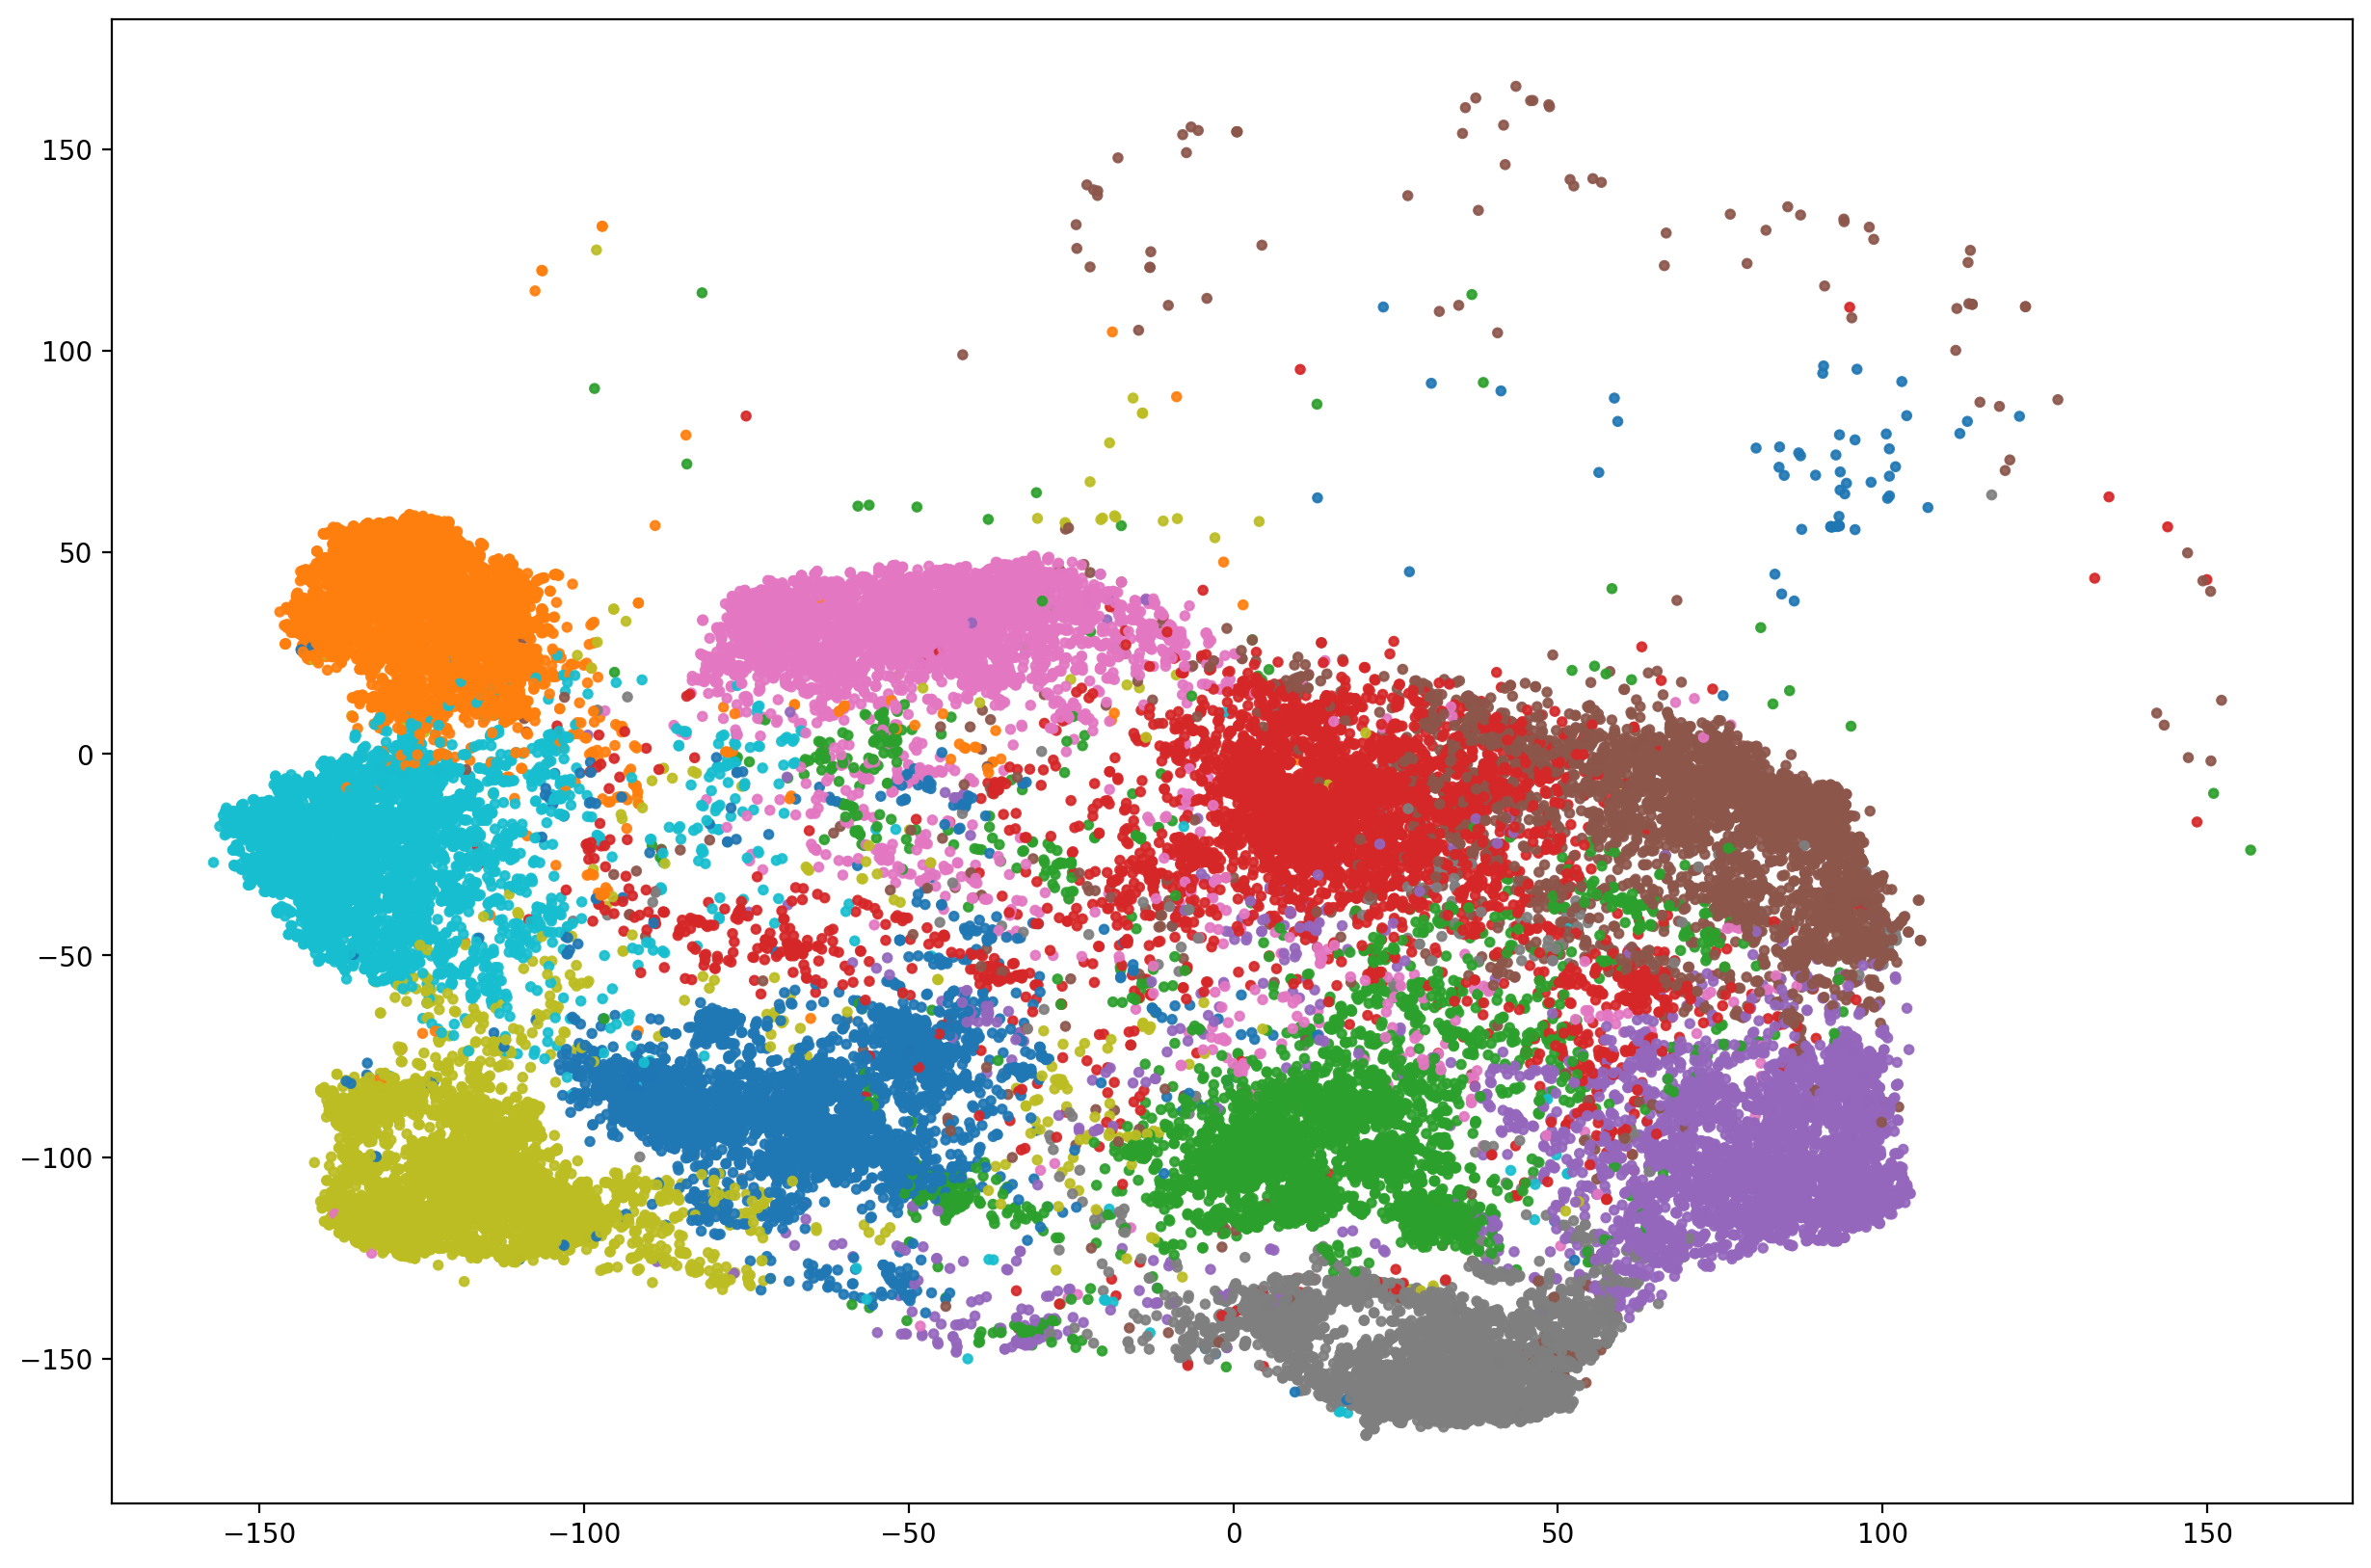

In [3]:
# Plot data with given mask.
data = np.load(f'{features_dir}resnet18_cifar10_mnist_cifar100_tsne.npz')['data']
labels = np.load(f'{features_dir}resnet18_cifar10_mnist_cifar100_tsne.npz')['labels']
mask = (labels != -1) & (labels != -2)

figure(figsize=(15,10), dpi=200)
plt.scatter(data[:,0][mask], data[:,1][mask], c=pd.Series(labels[mask]).map(color_list), s=10, alpha=0.9)

<Figure size 6000x600 with 0 Axes>

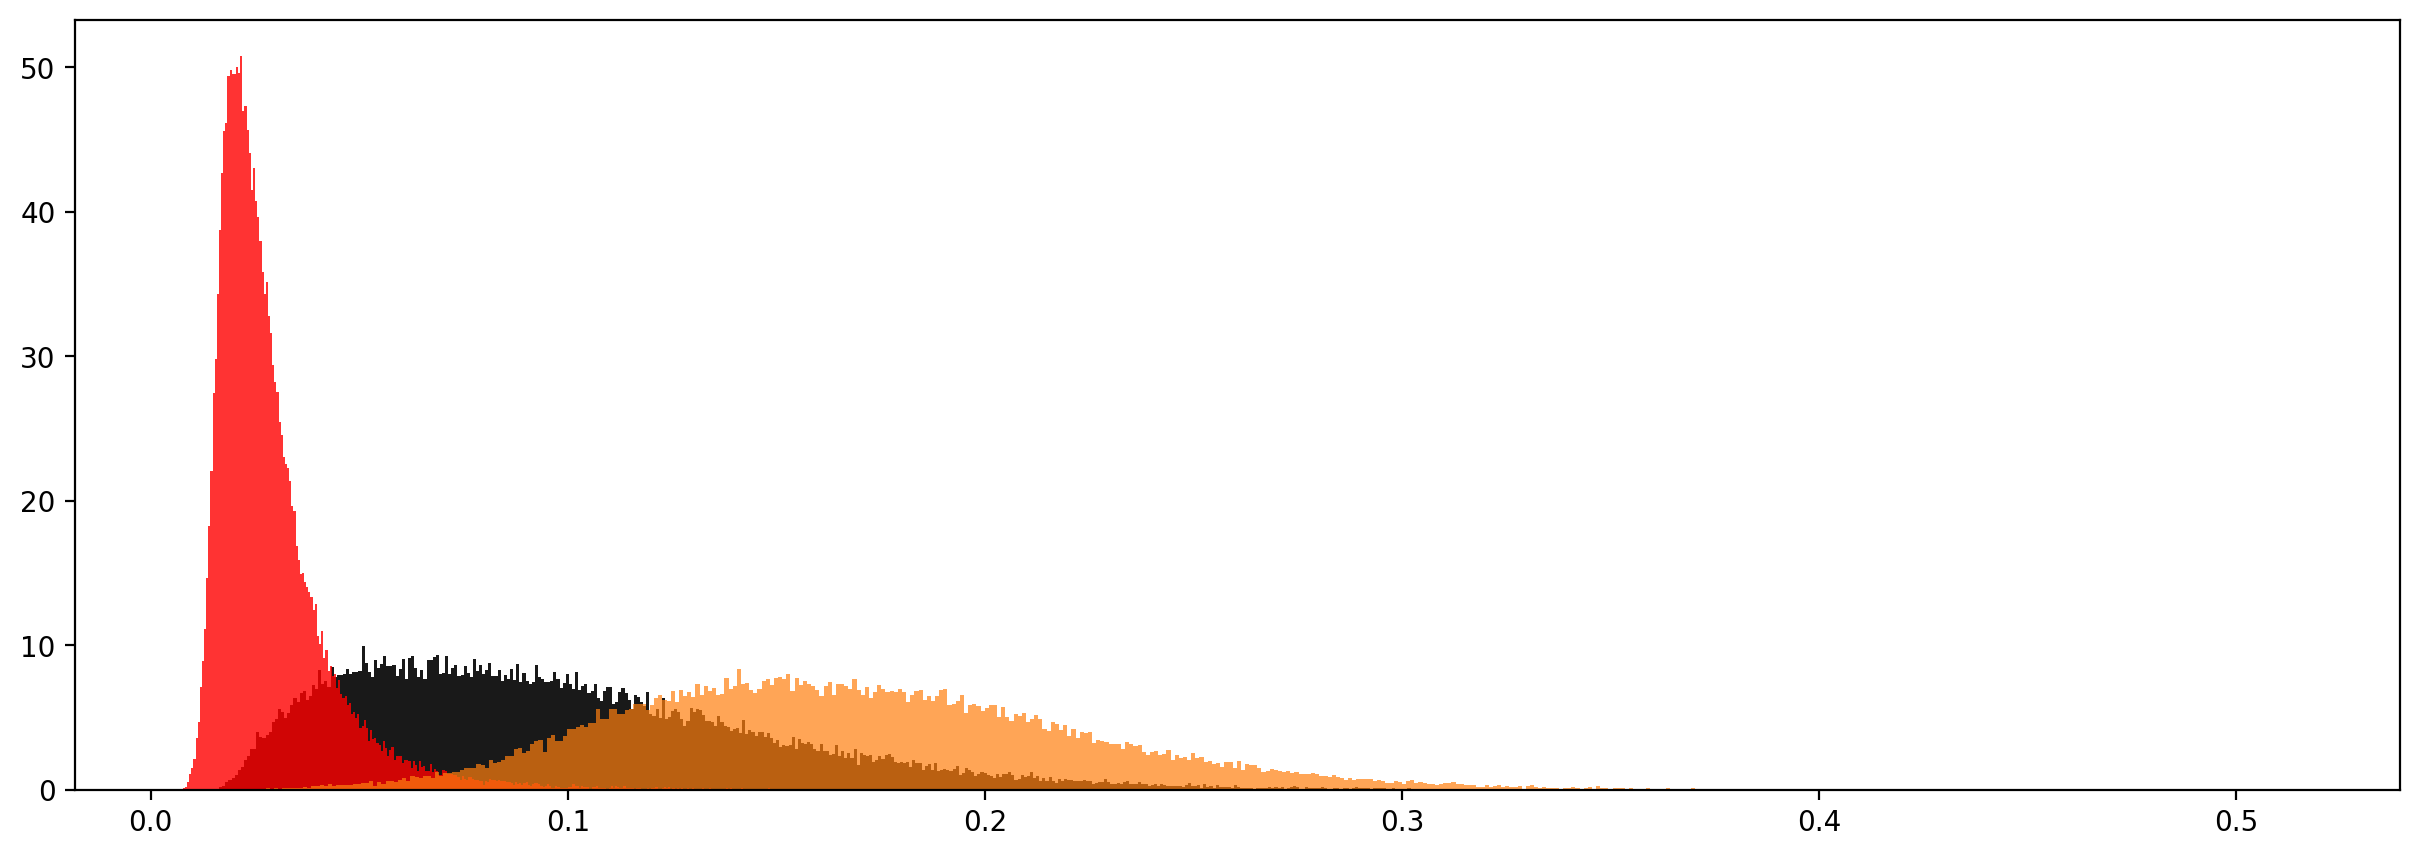

In [49]:
# Plot histograms of distance of data with given mask.
data = np.load(f'{features_dir}resnet18_cifar10_mnist_cifar100_knn.npz')['data']
labels = np.load(f'{features_dir}resnet18_cifar10_mnist_cifar100_knn.npz')['labels']

plt.figure(figsize=(30, 3), dpi=200)

n_bins = 500

figure(figsize=(15,5), dpi=200)
mask = (labels != -1) & (labels != -2) # cifar10
plt.hist(data[mask], n_bins, density=True, 
         weights=np.ones(len(data[mask])) / len(data[mask]), 
         facecolor='#000000', alpha=0.9) # black

mask = labels == -1 # cifar100
plt.hist(data[mask], n_bins, density=True, 
         weights=np.ones(len(data[mask])) / len(data[mask]), 
         facecolor='#FF0000', alpha=0.8) # red

mask = labels == -2 # mnist
plt.hist(data[mask], n_bins, density=True, 
         weights=np.ones(len(data[mask])) / len(data[mask]), 
         facecolor='#ff7f0e', alpha=0.7) # orange